In [36]:
import numpy as np
from scipy import signal
from scipy import fftpack
from scipy.io import wavfile
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [37]:
def calculate_pad_size(signal_length, window_width, window_offset):
    useful_space = signal_length % window_offset
    return int(window_width - useful_space) if useful_space != 0 else window_width - window_offset

def extract_overlapping_frames_from_signal(signal, window_width, window_offset):
    signal_length = signal.shape[-1]
    # We fill the signal to ensure the last frame has the appropriate length
    padding_needed = calculate_pad_size(signal_length, window_width, window_offset)
    padded_signal = np.concatenate(
        (
            signal,
            np.zeros(padding_needed)
        )
    )
    initial_frame_index = np.tile(
        np.arange(0, signal_length, window_offset),
        (window_width, 1)
    ).T
    consecutive_indexes_to_add = np.tile(
        np.arange(0, window_width),
        (initial_frame_index.shape[0], 1)
    )
    frame_indexes = initial_frame_index + consecutive_indexes_to_add

    return padded_signal[frame_indexes]

In [38]:

frequency, signal = wavfile.read("male_a_spa.wav")
signal = signal[:,0]

In [39]:
signal.shape

(16043,)

In [40]:
window_width = int(frequency * 0.025)
window_offset = int(frequency * 0.01)
frames = extract_overlapping_frames_from_signal(signal, window_width, window_offset)
windowed_frames_with_fourier_transform = fftpack.dct(frames)

In [41]:
windowed_frames_with_fourier_transform.shape

(101, 400)

In [42]:
cmap=get_cmap("coolwarm")

In [43]:
time = np.arange(0,windowed_frames_with_fourier_transform.shape[0])
time.shape

(101,)

In [44]:
frequency = np.arange(0,windowed_frames_with_fourier_transform.shape[1])
frequency.shape

(400,)

In [47]:
spectrogram = windowed_frames_with_fourier_transform.T

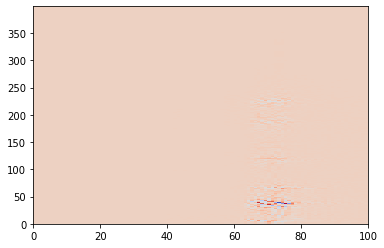

In [48]:

plt.pcolormesh(
    time,
    frequency, 
    spectrogram, 
    cmap=cmap)

In [49]:
spectrogram[0]

array([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00, -4.0000e+00, -5.2000e+01, -3.6400e+02,
       -5.2200e+02, -1.1320e+03, -1.3720e+03, -1.7180e+03, -2.6180e+03,
       -2.0700e+03, -2.5960e+03, -3.6700e+03, -3.1680e+03, -3.9700e+03,
       -3.8780e+03, -3.9880e+03, -3.7180e+03, -4.0600e+03, -3.4160e+03,
       -4.3380e+03, -4.7220e+03, -3.7920e+03, -5.6040e+03, -4.5260e+03,
       -6.6600e+03, -6.6760e+03, -6.9020e+03, -8.4240e+03, -7.5560e+03,
       -9.0560e+03, -1.0422e+04, -3.5040e+03, -3.4434e+04,  2.0592e+04,
       -4.5094e+04, -5.5206e+04,  6.0092e+04, -4.9854e+04, -8.30

In [50]:
maxs_i = np.apply_along_axis(np.argmax, 0, spectrogram)

In [51]:
maxs = np.apply_along_axis(np.amax, 0, spectrogram)

In [52]:
hpf_maxs_i = (maxs>100).astype(np.int) * maxs_i

Text(0, 0.5, 'Frequency')

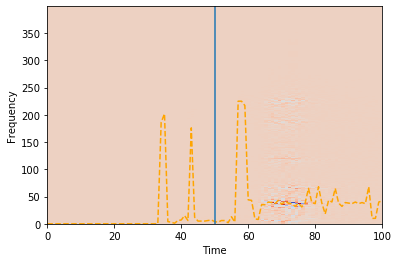

In [54]:
plt.pcolormesh(time, frequency, spectrogram, cmap=cmap)
plt.plot(time,frequency[hpf_maxs_i],"--",color="orange")
plt.axvline(time[50])
plt.xlabel('Time')
plt.ylabel('Frequency')